In [7]:
import pandas as pd
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

In [117]:
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv("spam.csv", encoding='latin-1')
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df = df.rename(columns={"v1":"spam", "v2":"text"})
df['spam'] = list(map(lambda spam: 1 if spam == 'spam' else 0, df['spam']))
df.head()

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001652D951DD8>]],
      dtype=object)

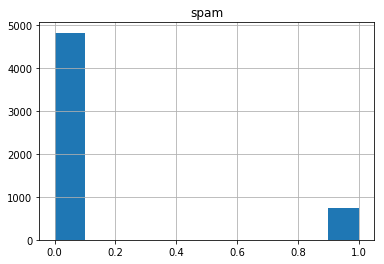

In [9]:
df.hist(column='spam')

In [164]:
df['length'] = df['text'].apply(len)
df['word_count'] = list(map(lambda text: len(text.split()), df['text']))
df['word_free'] = list(map(lambda text: 'free' in text.lower(), df['text']))
df['word_available'] = list(map(lambda text: 'available' in text.lower(), df['text']))
df['word_only'] = list(map(lambda text: 'only' in text.lower(), df['text']))
df['word_cash'] = list(map(lambda text: 'cash' in text.lower(), df['text']))
df['word_prize'] = list(map(lambda text: 'prize' in text.lower(), df['text']))
df['word_click'] = list(map(lambda text: 'click here' in text.lower(), df['text']))
df['word_winner'] = list(map(lambda text: 'winner' in text.lower(), df['text']))
df['word_cost'] = list(map(lambda text: 'cost' in text.lower(), df['text']))
df['word_jackpot'] = list(map(lambda text: 'jackpot' in text.lower(), df['text']))
df['word_mobile'] = list(map(lambda text: 'mobile' in text.lower(), df['text']))
df['word_http'] = list(map(lambda text: 'http' in text.lower(), df['text']))
df['word_numbers'] = list(map(lambda text: bool(re.search(r'\d\d\d\d', text)) , df['text']))
features = ['length', 'word_count', 'word_free','word_available','word_only','word_cash','word_prize', 'word_click', 'word_winner', 'word_cost','word_jackpot','word_mobile','word_http','word_numbers']
features2 = ['word_free', 'word_mobile','word_http','word_numbers']
df.head()

,spam,text,length,word_count,word_free,word_available,word_only,word_cash,word_prize,word_click,word_winner,word_cost,word_jackpot,word_mobile,word_http,word_urgent,word_numbers
0,0,"Go until jurong point, crazy.. Available only ...",111,20,False,True,True,False,False,False,False,False,False,False,False,False,False
1,0,Ok lar... Joking wif u oni...,29,6,False,False,False,False,False,False,False,False,False,False,False,False,False
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,True,False,False,False,False,False,False,False,False,False,False,False,True
3,0,U dun say so early hor... U c already then say...,49,11,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,False,False,False,False,False,False,False,False,False,False,False,False,False


In [165]:
features_train, features_test, labels_train, labels_test = train_test_split(
    df[features2], df['spam'], test_size=0.3, random_state=42)

In [166]:
model = GaussianNB()
model.fit(features_train, labels_train)
prediction_train = model.predict(features_train)
prediction_test = model.predict(features_test)
print(f'roc_auc on train: {roc_auc_score(labels_train, prediction_train)}')
print(f'roc_auc on test: {roc_auc_score(labels_test, prediction_test)}')

roc_auc on train: 0.9378336298932384
roc_auc on test: 0.951333565886357


In [167]:
model2 = LogisticRegression()
model2.fit(features_train, labels_train)
prediction_train2 = model2.predict(features_train)
prediction_test2 = model2.predict(features_test)
print(f'roc_auc on train: {roc_auc_score(labels_train, prediction_train2)}')
print(f'roc_auc on test: {roc_auc_score(labels_test, prediction_test2)}')

roc_auc on train: 0.9250074139976274
roc_auc on test: 0.9376679331378631


In [168]:
model2.score(features_train, labels_train)

0.9766666666666667

In [169]:
print(model2.densify())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [170]:
model2.decision_function(features_train)

array([-3.78331319, -3.78331319, -3.78331319, ..., -3.78331319,
       -3.78331319, -3.78331319])

In [107]:
model2.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'ovr',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [108]:
model2.predict_log_proba(features_train)

array([[-0.08480661, -2.50948545],
       [-0.01454915, -4.23748846],
       [-0.02138406, -3.85578236],
       ...,
       [-0.0320918 , -3.45515772],
       [-0.01511369, -4.19970176],
       [-0.01266775, -4.37502302]])

In [109]:
model2.predict_proba(features_train)

array([[0.91868993, 0.08131007],
       [0.98555618, 0.01444382],
       [0.97884296, 0.02115704],
       ...,
       [0.96841768, 0.03158232],
       [0.98499995, 0.01500005],
       [0.98741215, 0.01258785]])

In [171]:
coefs=model2.coef_
coefs

array([[2.33839655, 2.86706295, 4.00962357, 6.39616655]])

In [172]:
d=dict()
for i in range(len(features2)):
    #print(coefs[0][i])
    d.update({features2[i] : coefs[0][i]})


In [173]:
dfcoef = pd.Series(data=d)
dfcoef

word_free       2.338397
word_http       4.009624
word_mobile     2.867063
word_numbers    6.396167
dtype: float64

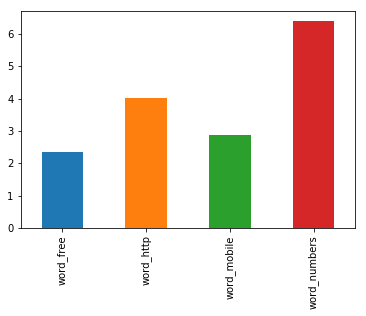

In [174]:
dfcoef.plot(kind='bar')

In [124]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression, Perceptron, TheilSenRegressor
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor


In [152]:
df_train1 = pd.read_excel('bankTestReport.xlsx', sheetname='Train')
df_train1['mar'] = df_train1.apply(lambda row: 1 if str(row.marital).startswith('marr') else 0, axis=1)
df_train1['edu'] = df_train1.apply(lambda row: 1 if str(row.education).startswith('university') or str(row.education).startswith('profess') else 0, axis=1)
df_train1['pout'] = df_train1.apply(lambda row: 1 if str(row.poutcome).startswith('success') else 0, axis=1)
df_train1['house'] = df_train1.apply(lambda row: 1 if str(row.housing).startswith('yes') else 0, axis=1)
df_train1['ln'] = df_train1.apply(lambda row: 0 if str(row.loan).startswith('yes') else 1, axis=1)
df_train1['jb'] = df_train1.apply(lambda row: 0 if str(row.job).startswith('un') else 1, axis=1)
df_train1['tel'] = df_train1.apply(lambda row: 1 if str(row.contact).startswith('tel') else 0, axis=1)
ind=int(df_train1.shape[0]*0.9)
df_train=df_train1.iloc[:ind]
df_test=df_train1.iloc[ind:]
df_train['y'] = df_train.apply(lambda row: 0 if str(row.y) == 'no'else 1, axis=1)
df_test['y'] = df_train1.apply(lambda row: 0 if str(row.y) == 'no'else 1, axis=1)
df_train.head()
df_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:118: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,mar,edu,pout,house,ln,jb,tel
2899,26,admin.,single,high.school,no,yes,no,telephone,jun,mon,...,4.961,5228.1,0,0,0,0,1,1,1,1
2900,54,entrepreneur,married,professional.course,no,no,no,cellular,nov,tue,...,4.153,5195.8,1,1,1,0,0,1,1,0
2901,51,blue-collar,divorced,unknown,unknown,no,no,telephone,jun,wed,...,4.962,5228.1,0,0,0,0,0,1,1,1
2902,22,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,0.882,4963.6,1,0,1,0,1,1,1,0
2903,48,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,4.858,5191.0,1,1,0,0,0,1,1,1


In [153]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,mar,edu,pout,house,ln,jb,tel
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1.313,5099.1,0,1,0,0,1,1,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.855,5191.0,0,0,0,0,0,1,1,1
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,4.962,5228.1,0,1,0,0,1,1,1,1
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,4.959,5228.1,0,1,0,0,0,1,1,1
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,4.191,5195.8,0,1,1,0,1,1,1,0


In [154]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,mar,edu,pout,house,ln,jb,tel
2899,26,admin.,single,high.school,no,yes,no,telephone,jun,mon,...,4.961,5228.1,0,0,0,0,1,1,1,1
2900,54,entrepreneur,married,professional.course,no,no,no,cellular,nov,tue,...,4.153,5195.8,1,1,1,0,0,1,1,0
2901,51,blue-collar,divorced,unknown,unknown,no,no,telephone,jun,wed,...,4.962,5228.1,0,0,0,0,0,1,1,1
2902,22,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,0.882,4963.6,1,0,1,0,1,1,1,0
2903,48,blue-collar,married,basic.9y,no,no,no,telephone,may,mon,...,4.858,5191.0,1,1,0,0,0,1,1,1


In [155]:
for column in df_train.columns:
    factor_values = sorted(df_train[column].unique().tolist())
    if len(factor_values) < 20:
        print(f"{column}: {factor_values}")
    else:
        print(f"{column}: [{min(factor_values)}: {max(factor_values)}]")

age: [18: 88]
job: ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown']
marital: ['divorced', 'married', 'single', 'unknown']
education: ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'unknown']
default: ['no', 'unknown']
housing: ['no', 'unknown', 'yes']
loan: ['no', 'unknown', 'yes']
contact: ['cellular', 'telephone']
month: ['apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']
day_of_week: ['fri', 'mon', 'thu', 'tue', 'wed']
duration: [0: 3643]
campaign: [1: 35]
pdays: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 15, 16, 18, 999]
previous: [0, 1, 2, 3, 4, 5, 6]
poutcome: ['failure', 'nonexistent', 'success']
emp.var.rate: [-3.4, -3.0, -2.9, -1.8, -1.7, -1.1, -0.2, -0.1, 1.1, 1.4]
cons.price.idx: [92.201: 94.767]
cons.conf.idx: [-50.8: -26.9]
euribor3m: [0.635: 5.045]
nr.employed: [4963.6, 4991.6, 5008.7, 5017.5, 5023.5

In [147]:
quality_factors = ['age',
                   'duration',
                   'previous',
                   'cons.price.idx',
                   'cons.conf.idx',
                   'nr.employed',
                   'mar',
                   'edu',
                   'pout',
                   'house',
                   'ln',
                   'jb',
                  ]
categorial_factors = list(set(df_train.columns) - set(quality_factors) - set('y')) 

In [156]:
model = LinearRegression().fit(df_train[quality_factors], df_train['y'])
print('roc auc')
print(roc_auc_score(df_train['y'], model.predict(df_train[quality_factors])))
print(roc_auc_score(df_test['y'], model.predict(df_test[quality_factors])))

roc auc
0.9227165990221065
0.9313349320543565


In [157]:
model.coef_

array([ 0.00091325,  0.00049409,  0.01242262,  0.02869266,  0.00463914,
       -0.00106818, -0.00945872,  0.0116286 ,  0.34529181, -0.00143058,
        0.0032955 , -0.02268185])

In [162]:
model2 = TheilSenRegressor().fit(df_train[quality_factors], df_train['y'])
print('roc auc')
print(roc_auc_score(df_train['y'], model2.predict(df_train[quality_factors])))
print(roc_auc_score(df_test['y'], model2.predict(df_test[quality_factors])))

roc auc
0.884470747494789
0.9178257394084732


In [163]:
model3 = RandomForestRegressor().fit(df_train[quality_factors], df_train['y'])
print('roc auc')
print(roc_auc_score(df_train['y'], model3.predict(df_train[quality_factors])))
print(roc_auc_score(df_test['y'], model3.predict(df_test[quality_factors])))

roc auc
0.9992400677341556
0.8747801758593126
